In [1]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pattern
from pattern.en import lemma

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

import numpy as np
import re

from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt

In [2]:
review_df = pd.read_csv('Review_Data.csv')
stop_words = set(stopwords.words('english'))

In [3]:
review_df

,asin,title,review,star
0,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Poor call quality ...,\n\n\n\n\n\n\n\n\n\n \n \n \n Got these ...,3.0
1,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Sound Output\n \n,\n\n\n\n\n\n\n\n\n\n \n \n \n Music qual...,5.0
2,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Wonderful\n \n,\n\n\n\n\n\n\n\n\n\n \n \n \n I was a bi...,5.0
3,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Hi\n \n,\n\n\n\n\n\n\n\n\n\n \n \n \n Hi\n\n \n,4.0
4,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Best earbuds for 5...,\n\n\n\n\n\n\n\n\n\n \n \n \n The produc...,5.0
...,...,...,...,...
2750,B07WMBGKMQ,\n\n\n\n\n\n\n\n \n \n Overall a good pro...,\n\n\n\n\n\n\n\n\n\n \n \n \n A product ...,4.0
2751,B07WMBGKMQ,\n\n\n\n\n\n\n\n \n \n Awesome sound qual...,\n\n\n\n\n\n\n\n\n\n \n \n \n The produc...,5.0
2752,B07WMBGKMQ,\n\n\n\n\n\n\n\n \n \n Charger case probl...,\n\n\n\n\n\n\n\n\n\n \n \n \n On the fir...,2.0
2753,B07WMBGKMQ,\n\n\n\n\n\n\n\n \n \n Just amazingggg!!!...,\n\n\n\n\n\n\n\n\n\n \n \n \n I always l...,5.0


In [4]:
cols = ['title', 'review']
review_df['combined'] = review_df[cols].apply(lambda row: '\n'.join(row.values.astype(str)), axis=1)
review_df.drop(['title','review'],axis = 1,inplace = True)
review_df.head()

,asin,star,combined
0,B0855T8JT2,3.0,\n\n\n\n\n\n\n\n \n \n Poor call quality ...
1,B0855T8JT2,5.0,\n\n\n\n\n\n\n\n \n \n Sound Output\n \n...
2,B0855T8JT2,5.0,\n\n\n\n\n\n\n\n \n \n Wonderful\n \n\n\...
3,B0855T8JT2,4.0,\n\n\n\n\n\n\n\n \n \n Hi\n \n\n\n\n\n\n...
4,B0855T8JT2,5.0,\n\n\n\n\n\n\n\n \n \n Best earbuds for 5...


In [5]:
def clean_data(stri):
    sent_lst = []

    for sent in sent_tokenize(stri):
        lst = []
        for word in word_tokenize(sent):
            if(word.isalpha() and not word in stop_words and len(word)>1):
                lst.append(word.lower())
        clean_sent = ' '.join(lst)
        sent_lst.append(clean_sent)

    para = '. '.join(sent_lst)
    return para

In [6]:
review_df['combined'] = review_df['combined'].apply(lambda x: clean_data(x))

In [7]:
review_df

,asin,star,combined
0,B0855T8JT2,3.0,poor call quality return got earphones long re...
1,B0855T8JT2,5.0,sound output music quality way better competit...
2,B0855T8JT2,5.0,wonderful bit skeptical buying performing beyo...
3,B0855T8JT2,4.0,hi hi
4,B0855T8JT2,5.0,best earbuds rs the product feels premium fit ...
...,...,...,...
2750,B07WMBGKMQ,4.0,overall good product product worth price range...
2751,B07WMBGKMQ,5.0,awesome sound quality the product truely value...
2752,B07WMBGKMQ,2.0,charger case problem on first day worked well....
2753,B07WMBGKMQ,5.0,just amazingggg. always look boat plan buying ...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
tfidf_matrix = tfidf.fit_transform(review_df['combined'])
feature_name = tfidf.get_feature_names()

df_tfidf = pd.DataFrame(tfidf_matrix.todense(),columns = feature_name)

df_tfidf

,aac,ability,able,abroad,absence,absolute,absolutely,absorbs,abstain,abt,...,youi,young,youngsters,youtube,youtubers,zeb,zebronics,zero,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
review_df['star'].value_counts()

5.0    1082
1.0     706
4.0     444
3.0     289
2.0     234
Name: star, dtype: int64

In [10]:
def update_star(star):
    if star == 5:
        return 1
    elif star in [3,4]:
        return 0
    else:
        return -1

review_df['star'] = review_df['star'].apply(lambda x: update_star(x))

review_df['star'].value_counts()

 1    1082
-1     940
 0     733
Name: star, dtype: int64

In [11]:
review_df['star'].value_counts()

 1    1082
-1     940
 0     733
Name: star, dtype: int64

In [12]:
X = df_tfidf
y = review_df['star'].ravel()

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=17)

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import numpy as np

def cross_val(model,X,y):
       
    f1_scr = []
    
    rfk = KFold(n_splits=3, random_state=None,shuffle = True)
    
    for train, test in rfk.split(X): ## you must do this on full dataset 
        print
        try:
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            
        except:
            X_train = X[train]
            X_test = X[test]
                        
        y_train = y[train]
        y_test = y[test]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred,average = 'micro')
        f1_scr.append(f1)
    print('F1 Score',np.mean(f1_scr))
                    
    return model

In [14]:
from sklearn import metrics

def pred(model,X,y):
    y_pred = model.predict(X)
    f1 = f1_score(y, y_pred,average = 'micro')
    print(f1)
    print(metrics.confusion_matrix(y, y_pred))
    print(metrics.classification_report(y, y_pred))

In [15]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

Log_Reg = cross_val(Log_Reg,X_train,y_train)
pred(Log_Reg,X_valid,y_valid)

F1 Score 0.7541500527285617
0.75453446191052
[[244  23  14]
 [ 53  87  67]
 [ 23  23 293]]
              precision    recall  f1-score   support

          -1       0.76      0.87      0.81       281
           0       0.65      0.42      0.51       207
           1       0.78      0.86      0.82       339

    accuracy                           0.75       827
   macro avg       0.73      0.72      0.72       827
weighted avg       0.74      0.75      0.74       827



In [16]:
from sklearn.tree import DecisionTreeClassifier

DCT_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

DCT_Classifier = cross_val(DCT_Classifier,X_train,y_train)
pred(DCT_Classifier,X_valid,y_valid)

F1 Score 0.6364103234933601
0.6336154776299879
[[204  55  22]
 [ 47  98  62]
 [ 46  71 222]]
              precision    recall  f1-score   support

          -1       0.69      0.73      0.71       281
           0       0.44      0.47      0.45       207
           1       0.73      0.65      0.69       339

    accuracy                           0.63       827
   macro avg       0.62      0.62      0.62       827
weighted avg       0.64      0.63      0.64       827



In [17]:
from sklearn.ensemble import RandomForestClassifier

RF_Classifier = cross_val(RandomForestClassifier(),X_train,y_train)
pred(RF_Classifier,X_valid,y_valid)

F1 Score 0.7297770219748099
0.7412333736396615
[[234  20  27]
 [ 44  75  88]
 [ 20  15 304]]
              precision    recall  f1-score   support

          -1       0.79      0.83      0.81       281
           0       0.68      0.36      0.47       207
           1       0.73      0.90      0.80       339

    accuracy                           0.74       827
   macro avg       0.73      0.70      0.69       827
weighted avg       0.73      0.74      0.72       827



In [18]:
from xgboost import XGBClassifier

XGB_Classifier = cross_val(XGBClassifier(),X_train,y_train)
pred(XGB_Classifier,X_valid,y_valid)

F1 Score 0.7318417529460973
0.7448609431680774
[[235  32  14]
 [ 53  99  55]
 [ 24  33 282]]
              precision    recall  f1-score   support

          -1       0.75      0.84      0.79       281
           0       0.60      0.48      0.53       207
           1       0.80      0.83      0.82       339

    accuracy                           0.74       827
   macro avg       0.72      0.72      0.71       827
weighted avg       0.74      0.74      0.74       827



In [19]:
from sklearn.svm import SVC

SVM_Classifier = cross_val(SVC(),X_train,y_train)
pred(SVM_Classifier,X_valid,y_valid)

F1 Score 0.7608917183051279
0.7678355501813785
[[246  27   8]
 [ 52  90  65]
 [ 23  17 299]]
              precision    recall  f1-score   support

          -1       0.77      0.88      0.82       281
           0       0.67      0.43      0.53       207
           1       0.80      0.88      0.84       339

    accuracy                           0.77       827
   macro avg       0.75      0.73      0.73       827
weighted avg       0.76      0.77      0.75       827



In [20]:
from sklearn.naive_bayes import MultinomialNB

MultiNB_Classifier = cross_val(MultinomialNB(),X_train,y_train)
pred(MultiNB_Classifier,X_valid,y_valid)

F1 Score 0.6913812622232558
0.7085852478839177
[[236   6  39]
 [ 55  23 129]
 [ 11   1 327]]
              precision    recall  f1-score   support

          -1       0.78      0.84      0.81       281
           0       0.77      0.11      0.19       207
           1       0.66      0.96      0.78       339

    accuracy                           0.71       827
   macro avg       0.74      0.64      0.60       827
weighted avg       0.73      0.71      0.65       827



2 :  0.010046256262535743
3 :  0.005153349423785959
4 :  0.005018446608865628
5 :  0.0048767767573274015
6 :  0.006704397565428418
7 :  0.007009172879320021
8 :  0.0075169527778049345
9 :  0.0083276560672795
10 :  0.008423998732733135
11 :  0.009008050346945594
12 :  0.008796499392835442
13 :  0.00902964387841016
14 :  0.010729053325393857
15 :  0.011205881940671875
16 :  0.01147545881009587
17 :  0.008302897751943466
18 :  0.01206609125505875
19 :  0.010520081996792203


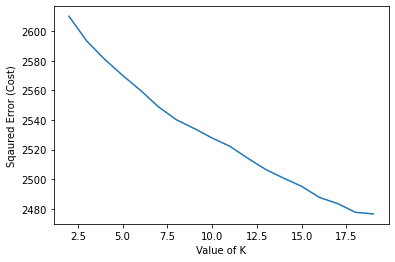

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_lst = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia_lst.append(kmeans.inertia_)
    print(i,': ',silhouette_score(X, kmeans.labels_, metric='euclidean'))
    
plt.plot(range(2,20),inertia_lst)
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()